In [ ]:
# Analyze customer data from a telecom provider and build machine learning models to predict churn. Dataset: Telco Customer Churn with 7,043 customer records.

"""
The Telco Customer Churn dataset typically contains:

CustomerID – Unique ID for each customer

Demographic info – Gender, SeniorCitizen, Partner, Dependents

Account info – Tenure, Contract, PaymentMethod, MonthlyCharges, TotalCharges

Service info – PhoneService, InternetService, OnlineSecurity, TechSupport, etc.

Target variable – Churn (Yes/No)

Goal: Predict Churn based on customer characteristics.

These are the steps to be followed:
"""



In [ ]:
#Load the dataset:
import pandas as pd

df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

#Preprocessing of data:
'''
Check for:

Missing values

Data types (TotalCharges may be string)

Class imbalance (churn is often < 30%)
'''
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.select_dtypes('object'):
    if col != 'customerID':
        df[col] = le.fit_transform(df[col])
'''
3. Feature selection

Drop customerID

Target = Churn

Features = all other columns
'''
from sklearn.model_selection import train_test_split

X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# A model to train data for classifocation: Random Forest:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

'''
5. Model Evaluation

Metrics:

Accuracy (good for balanced data)

Precision, Recall, F1-score (important for imbalanced churn data)

ROC-AUC score
'''

from sklearn.metrics import roc_auc_score

y_proba = rf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_proba)


Dataset shape: (30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL

C:\Users\Anantks\Desktop\sproject\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:21:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.36      0.46      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.79      0.81      0.79      6000

XGBoost ROC-AUC: 0.7679841917630036


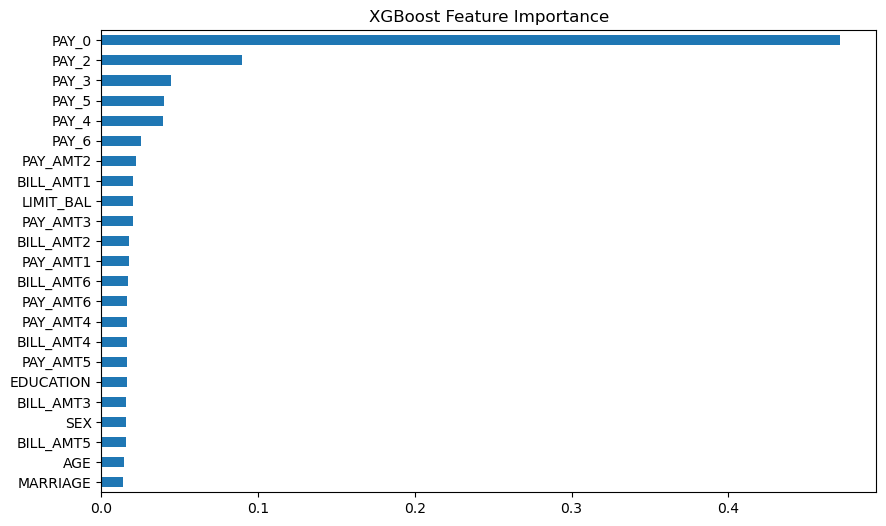

[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3264
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221208 -> initscore=-1.258639
[LightGBM] [Info] Start training from score -1.258639
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [3]:
# #Apply parallel tree boosting algorithms (such as XGBoost, LightGBM, or CatBoost) to a real-world dataset to predict customer default behavior. 
#Dataset: UCI Credit Card Default Dataset with 30,000 records.

# ============================================
# Credit Card Default Prediction - Boosting
# Dataset: UCI Credit Card Default (30,000 records)
# Algorithms: XGBoost, LightGBM, CatBoost
# ============================================

# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Boosting libraries
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# 2. Load Dataset
df = pd.read_csv('UCI_Credit_Card.csv')
print("Dataset shape:", df.shape)
df.head()

# 3. Basic Exploration
print(df.info())
print(df.describe())
print(df['default.payment.next.month'].value_counts(normalize=True))

# 4. Preprocessing
# Drop ID column
df.drop(columns=['ID'], inplace=True)

# Define categorical features
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

# Features and target
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

# 5. Train/Test Split
X_train_res, X_test, y_train_res, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# 6. Model Training

# # ----- 7.1 XGBoost -----
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    n_jobs=-1
)
xgb_model.fit(X_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:,1]

print("=== XGBoost Classification Report ===")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_proba_xgb))

# Feature importance
feat_importances = pd.Series(xgb_model.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6), title="XGBoost Feature Importance")
plt.show()

# ----- 7.2 LightGBM -----
lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    n_jobs=-1
)
lgb_model.fit(X_train_res, y_train_res)
y_pred_lgb = lgb_model.predict(X_test)
y_proba_lgb = lgb_model.predict_proba(X_test)[:,1]

print("=== LightGBM Classification Report ===")
print(classification_report(y_test, y_pred_lgb))
print("LightGBM ROC-AUC:", roc_auc_score(y_test, y_proba_lgb))

# ----- 7.3 CatBoost -----
cat_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    verbose=0,
    cat_features=cat_features
)
cat_model.fit(X_train_res, y_train_res)
y_pred_cat = cat_model.predict(X_test)
y_proba_cat = cat_model.predict_proba(X_test)[:,1]

print("=== CatBoost Classification Report ===")
print(classification_report(y_test, y_pred_cat))
print("CatBoost ROC-AUC:", roc_auc_score(y_test, y_proba_cat))

# 8. Comparison Table
results = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'ROC-AUC': [roc_auc_score(y_test, y_proba_xgb),
                roc_auc_score(y_test, y_proba_lgb),
                roc_auc_score(y_test, y_proba_cat)]
})
print(results)

# 9. Insights
print("""
Expected Insights:
- Past repayment status (PAY_0 to PAY_6) is the most predictive.
- Credit limit (LIMIT_BAL) and bill/payment amounts are also important.
- SMOTE improves recall on minority class (defaults).
- Month-to-month repayment behavior heavily affects default probability.
""")



In [ ]:
#Predict traffic congestion levels public APIs (e.g., Google Traffic, OpenTraffic) data or real-time traffic data from city traffic sensors or open datasets.

'''
1) Problem framing

Predict traffic congestion level for a road segment (or traffic sensor / link) for short-term horizons (e.g., 5, 15, 30, 60 minutes). Output can be:

Regression → predict continuous speed / travel time / volume.
Classification → categorical congestion levels (e.g., Free / Light / Moderate / Heavy).

Common targets:

Travel speed (km/h or m/s)
Travel time index (ratio of observed travel time to free-flow)
Congestion class (derived from speed thresholds)

Quick LightGBM example::


'''
# Requirements: pandas, numpy, scikit-learn, lightgbm
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# assume df has columns: ['sensor_id', 'timestamp', 'speed'] and is at 5-min frequency
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(['sensor_id','timestamp'])

# create lag and rolling features per sensor
def make_features(group):
    group = group.set_index('timestamp').asfreq('5T')  # reindex to fixed freq if needed
    group['speed_ffill'] = group['speed'].ffill()      # simple imputation
    for lag in [1,2,3,6]:  # lags in 5-min steps (5,10,15,30 min)
        group[f'speed_lag_{lag}'] = group['speed_ffill'].shift(lag)
    group['speed_roll_mean_3'] = group['speed_ffill'].rolling(3).mean()
    group['speed_roll_std_3']  = group['speed_ffill'].rolling(3).std().fillna(0)
    group['hour'] = group.index.hour
    group['dow']  = group.index.dayofweek
    return group.reset_index()

feat = df.groupby('sensor_id').apply(make_features).reset_index(drop=True)

# target: speed 15 minutes ahead (3 steps)
feat['target_speed_15m'] = feat.groupby('sensor_id')['speed'].shift(-3)

# drop rows with NaN target or features
train_df = feat.dropna(subset=['target_speed_15m'])

# features and target
features = [c for c in train_df.columns if c not in ['sensor_id','timestamp','speed','target_speed_15m']]
X = train_df[features]
y = train_df['target_speed_15m']

# time-aware split
tscv = TimeSeriesSplit(n_splits=5)
maes = []
for train_idx, val_idx in tscv.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval   = lgb.Dataset(X_val, label=y_val, reference=dtrain)
    params = {'objective':'regression','metric':'mae','learning_rate':0.05,'num_leaves':31}
    model = lgb.train(params, dtrain, valid_sets=[dval], early_stopping_rounds=50, num_boost_round=2000, verbose_eval=50)
    preds = model.predict(X_val, num_iteration=model.best_iteration)
    maes.append(mean_absolute_error(y_val, preds))

print("CV MAE:", np.mean(maes))


In [ ]:
#Predict future household electricity usage (in kilowatts) using historical consumption patterns.

"""
Data columns::

| Column                  | Description                                                      |
| ----------------------- | ---------------------------------------------------------------- |
| `Date`                  | Date in format dd/mm/yyyy                                        |
| `Time`                  | Time in format hh:mm:ss                                          |
| `Global_active_power`   | Household global minute-averaged active power (kW)               |
| `Global_reactive_power` | Reactive power (kW)                                              |
| `Voltage`               | Average voltage (V)                                              |
| `Global_intensity`      | Average current intensity (A)                                    |
| `Sub_metering_1`        | Energy sub-meter 1 (kitchen appliances, in watt-hour)            |
| `Sub_metering_2`        | Energy sub-meter 2 (laundry room, in watt-hour)                  |
| `Sub_metering_3`        | Energy sub-meter 3 (water-heater, air-conditioner, in watt-hour) |

LightGBM is a gradient boosting model excellent for time-series regression with lag features.
We used past lags (1–24 hours) + calendar features (hour, weekday, month).
This captures both short-term and seasonal patterns.
For longer-range forecasting (multi-step), you can iterate predictions (recursive strategy).

"""

In [4]:
# ----------------------------
# Import Libraries
# ----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

In [17]:
# STEP 1: Read the file (no deprecated options)
data = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    low_memory=False,
    na_values=['?']
)

# STEP 2: Combine 'Date' and 'Time' columns to create a proper datetime column
data['datetime'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'],
    format='%d/%m/%Y %H:%M:%S',
    errors='coerce'   # ensures any bad rows are safely handled as NaT
)

# STEP 3: Drop any rows where datetime couldn't be parsed (optional)
data = data.dropna(subset=['datetime'])

# STEP 4: Drop old columns and set index
data = data.drop(['Date', 'Time'], axis=1)
data = data.set_index('datetime')

# STEP 5: Convert numeric columns to float
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# STEP 6: Drop missing values
data = data.dropna()

# ----------------------------
# STEP 3: Resample to Hourly Frequency
# ----------------------------
hourly = data.resample('H').mean()
print("✅ Hourly dataset shape:", hourly.shape)
# Verify
print(data.head())
print("\n✅ DataFrame ready with datetime index and numeric columns.")
print(data.info())

C:\Users\Anantks\AppData\Local\Temp\ipykernel_12588\979939677.py:33: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly = data.resample('H').mean()


✅ Hourly dataset shape: (34589, 7)
                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3104
[LightGBM] [Info] Number of data points in the train set: 26096, number of used features: 15
[LightGBM] [Info] Start training from score 1.090273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

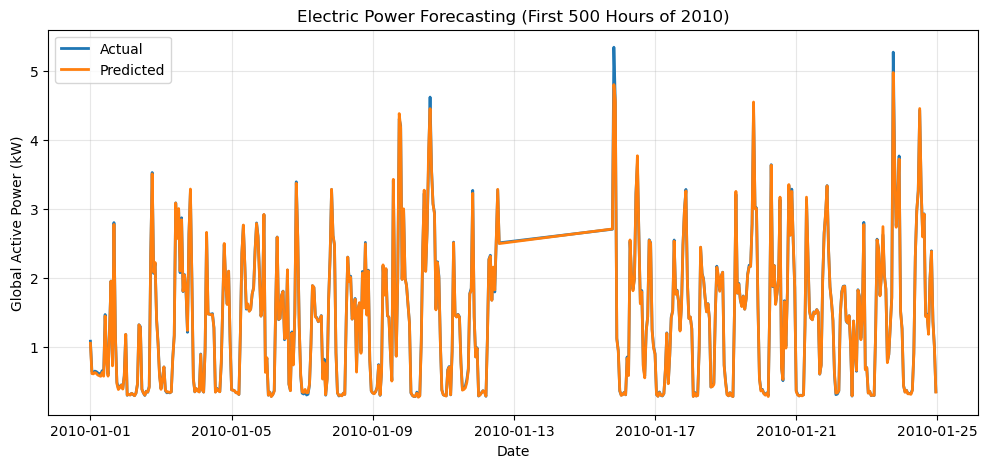

In [18]:
# ----------------------------
# STEP 4: Feature Engineering
# ----------------------------
hourly['hour'] = hourly.index.hour
hourly['dayofweek'] = hourly.index.dayofweek
hourly['month'] = hourly.index.month

# Create lag features for previous hours
for lag in [1, 2, 3, 6, 12, 24]:
    hourly[f'lag_{lag}'] = hourly['Global_active_power'].shift(lag)

# Drop rows with NaNs caused by lag creation
hourly = hourly.dropna()

# ----------------------------
# STEP 5: Train-Test Split
# ----------------------------
train = hourly.loc['2007':'2009']
test = hourly.loc['2010']

X_train = train.drop('Global_active_power', axis=1)
y_train = train['Global_active_power']

X_test = test.drop('Global_active_power', axis=1)
y_test = test['Global_active_power']

# ----------------------------
# STEP 6: Train Model (LightGBM)
# ----------------------------
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    num_leaves=64,
    random_state=42
)
model.fit(X_train, y_train)

# ----------------------------
# STEP 7: Make Predictions
# ----------------------------
y_pred = model.predict(X_test)

# ----------------------------
# STEP 8: Evaluate
# ----------------------------
mae = mean_absolute_error(y_test, y_pred)
print(f"✅ Mean Absolute Error: {mae:.4f} kW")

# ----------------------------
# STEP 9: Visualize Results
# ----------------------------
plt.figure(figsize=(12,5))
plt.plot(y_test.index[:500], y_test[:500], label='Actual', linewidth=2)
plt.plot(y_test.index[:500], y_pred[:500], label='Predicted', linewidth=2)
plt.title("Electric Power Forecasting (First 500 Hours of 2010)")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
#Classify product or service reviews as positive/negative/neutral. Dataset: Amazon Product Reviews, Yelp Dataset, or Kaggle reviews datasets.
'''
Dataset describtion:

| review_id | review_text                                                | sentiment |
| --------- | ---------------------------------------------------------- | --------- |
| 1         | "The product quality is amazing, totally worth the price!" | positive  |
| 2         | "Terrible service, I’ll never buy again."                  | negative  |
| 3         | "It’s okay, nothing special but not bad either."           | neutral   |
| 4         | "Loved the sound quality and battery life!"                | positive  |
| 5         | "Packaging was poor and delivery delayed."                 | negative  |

Model Choice: Logistic Regression

✅ Why used:
Fast and effective for baseline text classification (sentiment analysis)
Works well with TF-IDF vectorization of text.
Interpretable and performs competitively on small to medium datasets.


'''

In [20]:
# ----------------------------
# STEP 1: Import Libraries
# ----------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# ----------------------------
# STEP 2: Sample Dataset
# ----------------------------
data = pd.DataFrame({
    'review_text': [
        "The product quality is amazing, totally worth the price!",
        "Terrible service, I’ll never buy again.",
        "It’s okay, nothing special but not bad either.",
        "Loved the sound quality and battery life!",
        "Packaging was poor and delivery delayed.",
        "Customer support was helpful and quick.",
        "Food was stale and cold when delivered.",
        "Very comfortable and stylish shoes!",
        "Average performance, not impressed.",
        "Excellent experience overall!"
    ],
    'sentiment': [
        'positive', 'negative', 'neutral', 'positive', 'negative',
        'positive', 'negative', 'positive', 'neutral', 'positive'
    ]
})

# ----------------------------
# STEP 3: Split Data
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    data['review_text'], data['sentiment'], test_size=0.3, random_state=42
)

# ----------------------------
# STEP 4: Text Vectorization (TF-IDF)
# ----------------------------
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# ----------------------------
# STEP 5: Train Model (Logistic Regression)
# ----------------------------
model = LogisticRegression(max_iter=500)
model.fit(X_train_tfidf, y_train)

# ----------------------------
# STEP 6: Evaluate
# ----------------------------
y_pred = model.predict(X_test_tfidf)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

Classification Report:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3

